# Diseño y Análisis de Algoritmos INF413

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

In [1]:
from platform import python_version

print(python_version())

import time

help(time.time)

3.7.13
Help on built-in function time in module time:

time(...)
    time() -> floating point number
    
    Return the current time in seconds since the Epoch.
    Fractions of a second may be present if the system clock provides them.



In [118]:
import math


def binary_search(arr, low, high, x):
  if high >= low:
    mid = (high + low) // 2
    if arr[mid] == x:
      return mid
    elif arr[mid] > x:
      return binary_search(arr, low, mid - 1, x)
    else:
      return binary_search(arr, mid + 1, high, x)
  else:
    return -1
 
def linear_search(arr,low, high,x):
  j=len(arr)
  for pos,a in enumerate(arr):
    if a==x:
      return pos
  return -1

In [119]:
arr=sorted(np.random.randint(1e6,size=np.int64(1e2)).tolist())

In [123]:
val=arr[99]

In [124]:
binary_search(arr,0,len(arr),val)

99

In [125]:
linear_search(arr,0,len(arr),val)

99

# Costo Lineal

El costo constante se refiere al caso cuando el algoritmo tiene costo lineal al tamaño del problema $\mathcal{O}(n)$

In [126]:
import time
import numpy as np


time_data={'method':list(),'ellapsed_time':list(),'problem_size':list()}
problems={1e2,1e3,1e4,1e5}
methods=['binary_search','linear_search']
sample_size=1000
for m in methods:
  for p in problems:
    for i in range(sample_size):
      arr=sorted(np.random.randint(1e6,size=np.int64(p)).tolist())
      pos=np.random.randint(p)
      val=arr[pos]
      t1=time.time()
      eval(m)(arr,0,len(arr),val)
      ellapsed_time=time.time()-t1
      time_data['problem_size'].append(p)
      time_data['method'].append(m)
      time_data['ellapsed_time'].append(ellapsed_time)

In [127]:
import pandas as pd

df=pd.DataFrame(time_data,columns=time_data.keys())

In [128]:
df['problem_size']=df['problem_size'].astype('int64')

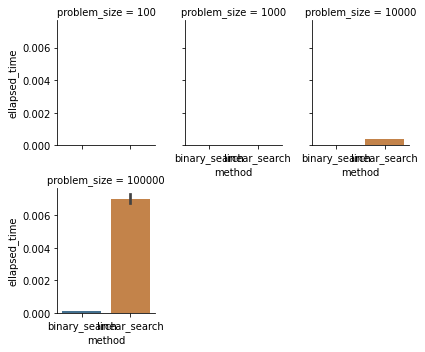

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x="method", y="ellapsed_time", col="problem_size",data=df, saturation=.5,
                kind="bar", col_wrap=3, height=2.5, aspect=.8)

In [130]:
df.groupby(['method','problem_size']).mean()

ellapsed_time
method        problem_size               
binary_search 100                0.000014
              1000               0.000015
              10000              0.000030
              100000             0.000096
linear_search 100                0.000011
              1000               0.000046
              10000              0.000393
              100000             0.007008

Primero comprobamos que para un mismo tamaño de entrada, ambos metodos entregan resultados diferentes de tiempo de ejecucion

In [131]:
from scipy import stats

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.

for n in sorted(problems):
    pvalue=stats.ttest_ind(df.loc[(df['method'] == 'binary_search') & (df['problem_size'] ==n)]['ellapsed_time'],
                           df.loc[(df['method'] == 'linear_search') & (df['problem_size'] ==n)]['ellapsed_time'])[1]
    print('n={0}, valor-p : {1:06.8f}'.format(n,pvalue))
    if pvalue > 0.05:
        print('Datos provienen de la misma distribucion')
    else:
        print('Datos provienen de distribuciones diferentes')
    print('----------------------------------------')

n=100.0, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=1000.0, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=10000.0, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=100000.0, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------


Una consideracion importante al comparar poblaciones es el tamaño muestreal. En poblaciones pequeñas, no es posible determinar variaciones en sus medias o varianzas.

In [132]:
from scipy.stats import ttest_ind
import numpy as np

# problema con tama~{n}os de muestra peque~{n}os!

samples=5
data1 = np.random.normal(1,1,samples)
data2 = np.random.normal(0,1,samples)
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Datos provienen de la misma distribucion')
else:
    print('Datos provienen de distribuciones diferentes')

stat=0.716, p=0.495
Datos provienen de la misma distribucion


# Tarea

En este laboratorio Ud debe completar las siguientes tareas:

    1.) Comparar dos implementaciones distintas para una funcion de costo lineal.
    2.) Reportar los tiempos de ejecucion para distintos tamaños de problema.
    3.) Evaluar los valores-p para cada tamaño de problema e implementación.

https://stackoverflow.com/questions/20458132/recursive-cumulative-sum